Machine Learning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset:

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.csv", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

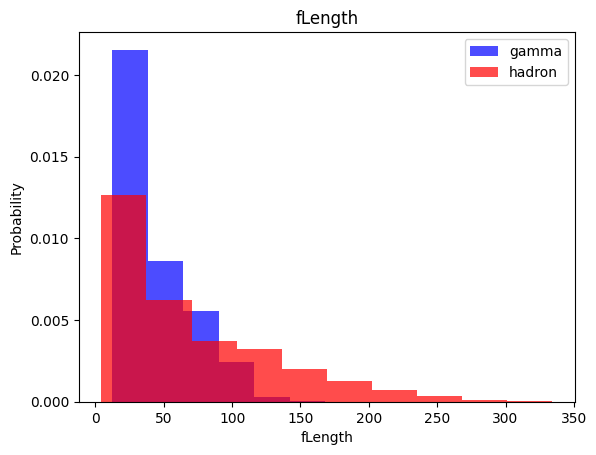

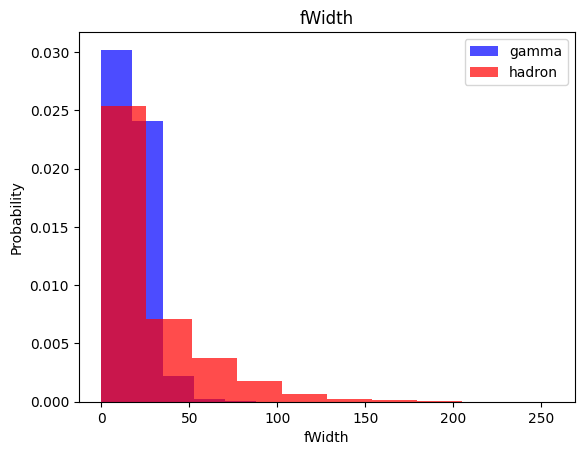

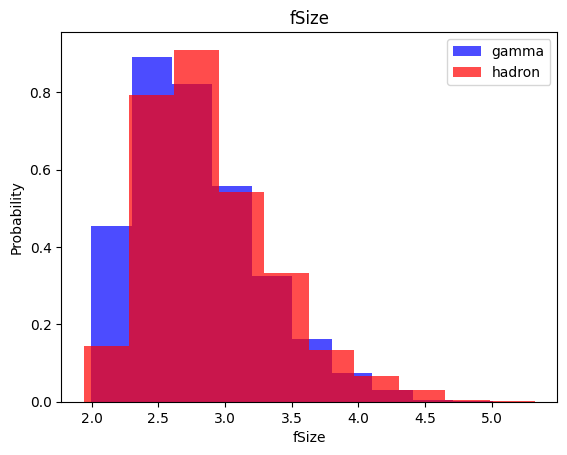

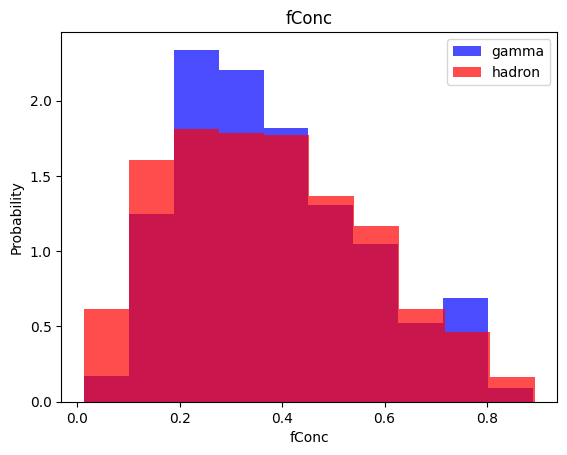

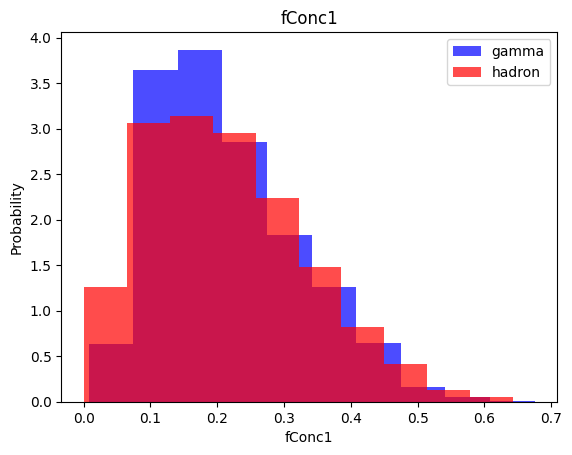

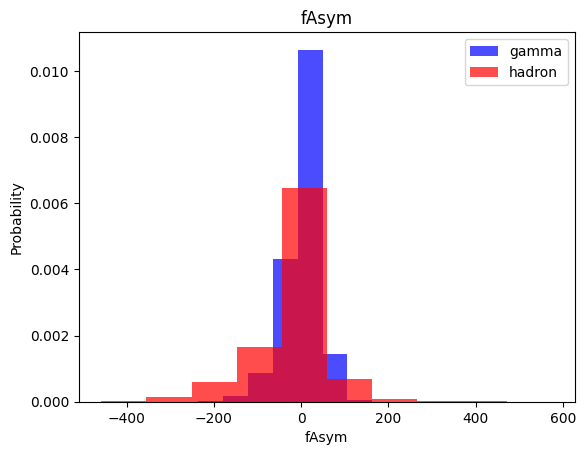

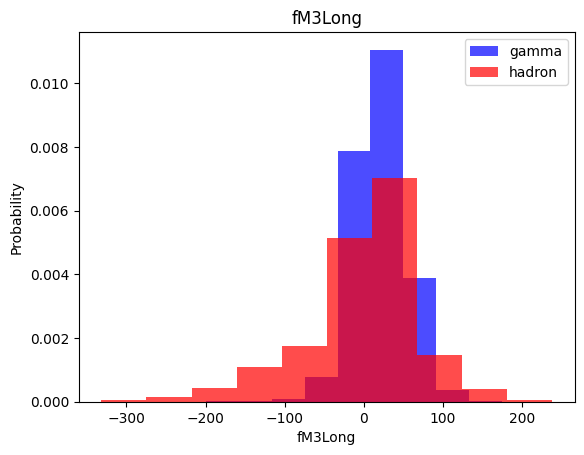

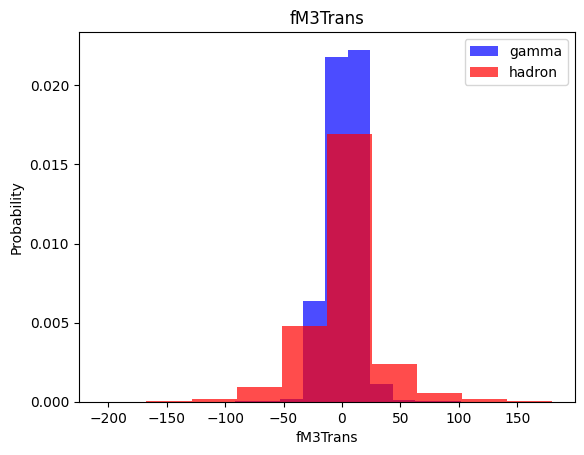

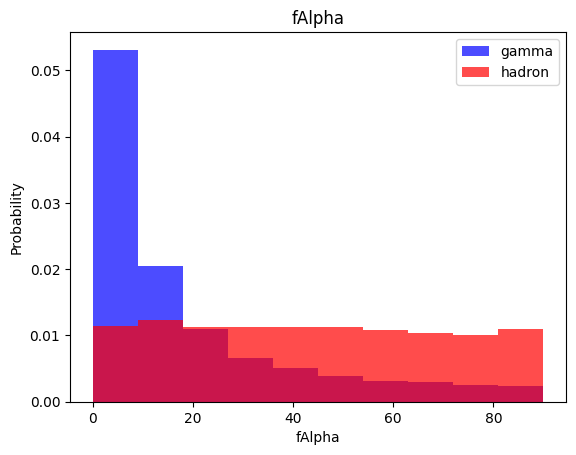

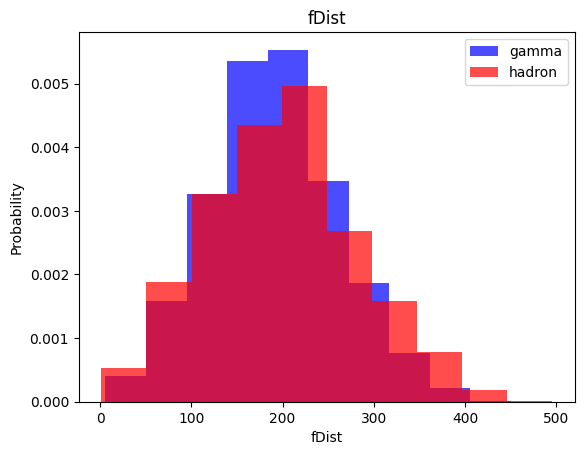

In [8]:
for label in cols[:-1]:#up to the last item
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, validation, test datasets

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/fcisco1701/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

kNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1388
           1       0.85      0.87      0.86      2416

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51      1388
           1       0.73      0.91      0.81      2416

    accuracy                           0.72      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



Log Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1388
           1       0.84      0.82      0.83      2416

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1388
           1       0.89      0.90      0.90      2416

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



Neural Net

In [23]:
import tensorflow as tf

2023-11-10 18:28:29.377685: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-10 18:28:29.378930: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 18:28:29.396915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 18:28:29.396951: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 18:28:29.396973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [24]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [25]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')#projecting out outputs from either 0 to 1
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


2023-11-10 18:29:30.569057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-10 18:29:30.569267: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


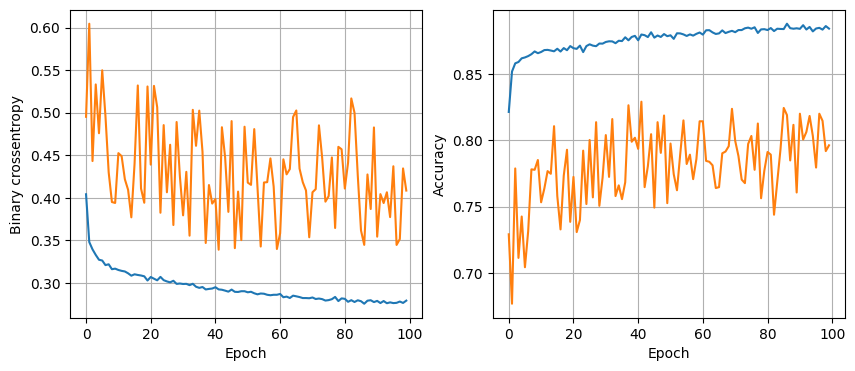

119/119 [==============================] - 0s 665us/step - loss: 0.3253 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.01, batch size 64


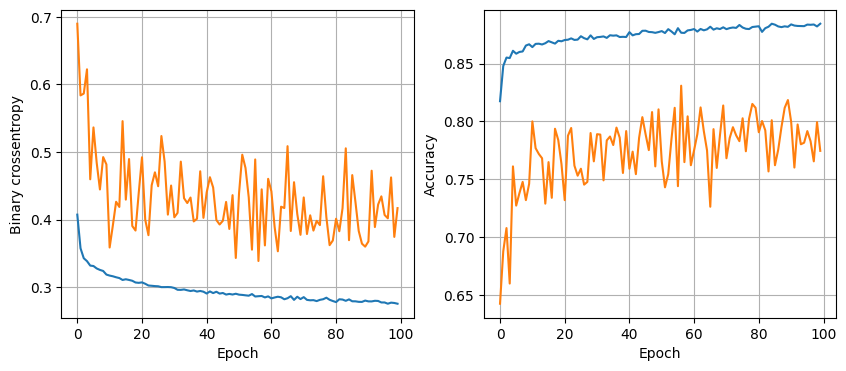

119/119 [==============================] - 0s 681us/step - loss: 0.3390 - accuracy: 0.8596
16 nodes, dropout 0, lr 0.01, batch size 128


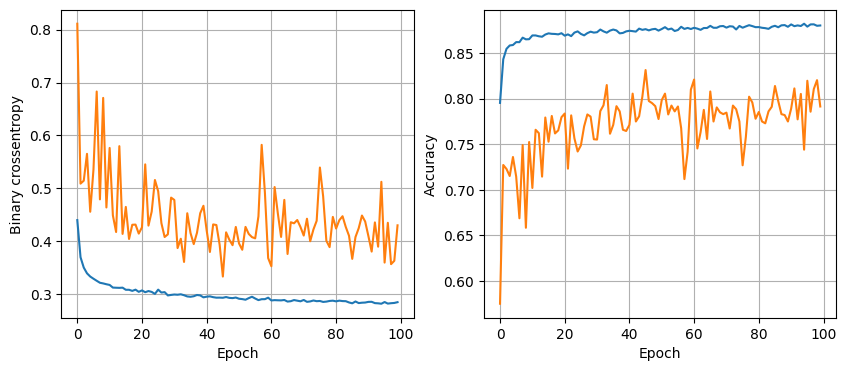

119/119 [==============================] - 0s 642us/step - loss: 0.3325 - accuracy: 0.8609
16 nodes, dropout 0, lr 0.005, batch size 32


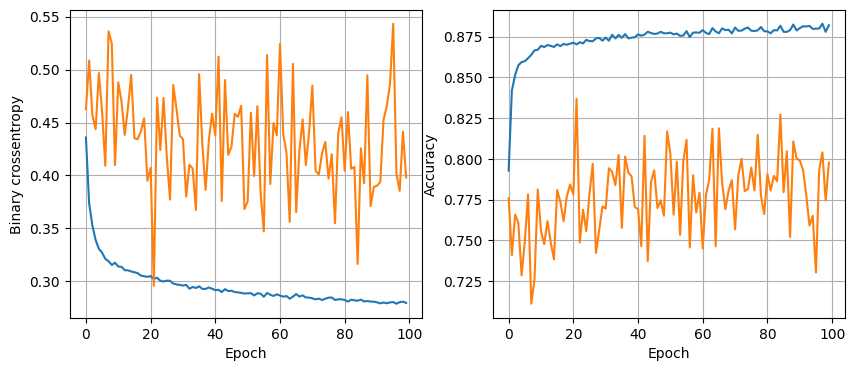

119/119 [==============================] - 0s 582us/step - loss: 0.3198 - accuracy: 0.8680
16 nodes, dropout 0, lr 0.005, batch size 64


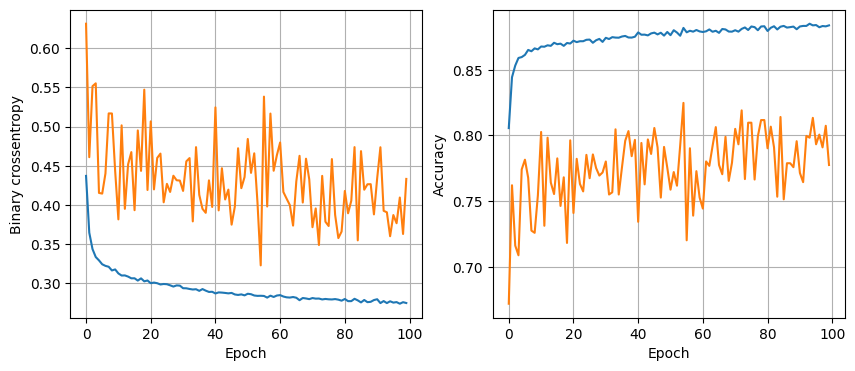

119/119 [==============================] - 0s 616us/step - loss: 0.3282 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.005, batch size 128


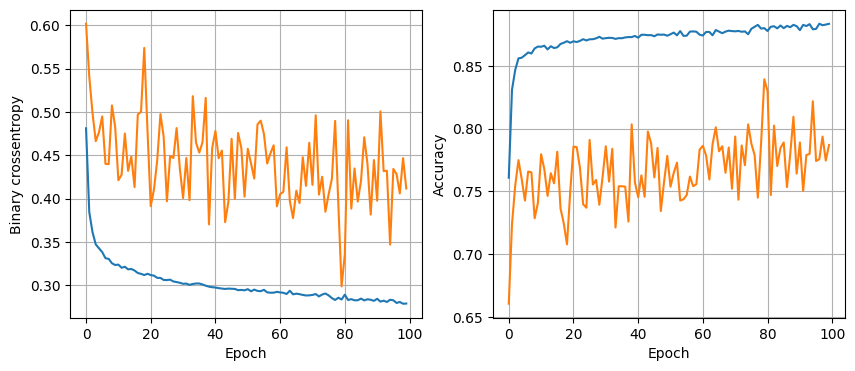

119/119 [==============================] - 0s 570us/step - loss: 0.3249 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.001, batch size 32


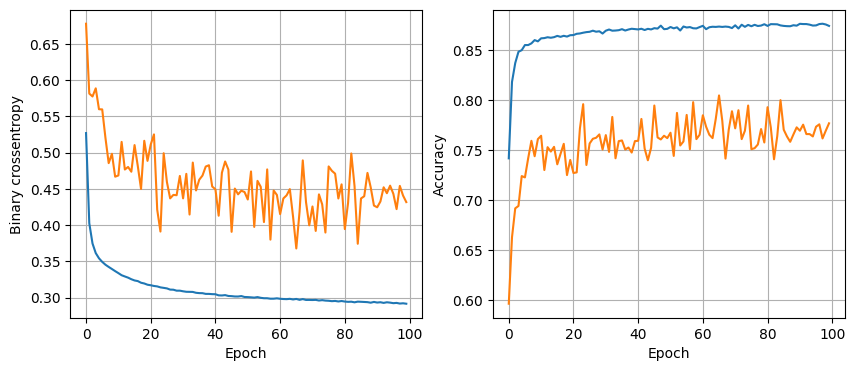

119/119 [==============================] - 0s 571us/step - loss: 0.3196 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.001, batch size 64


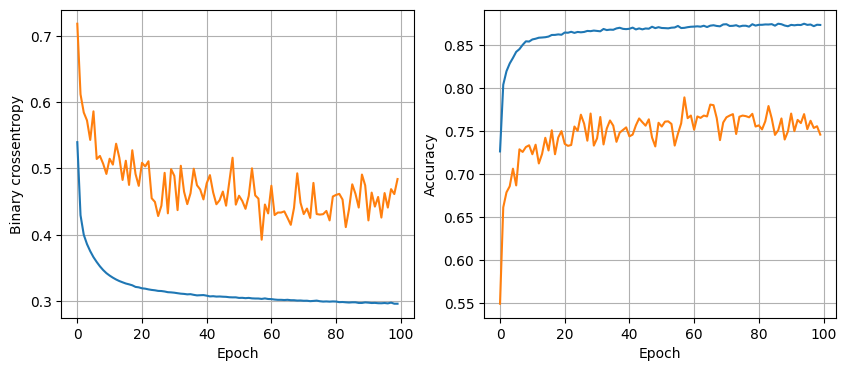

119/119 [==============================] - 0s 632us/step - loss: 0.3172 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.001, batch size 128


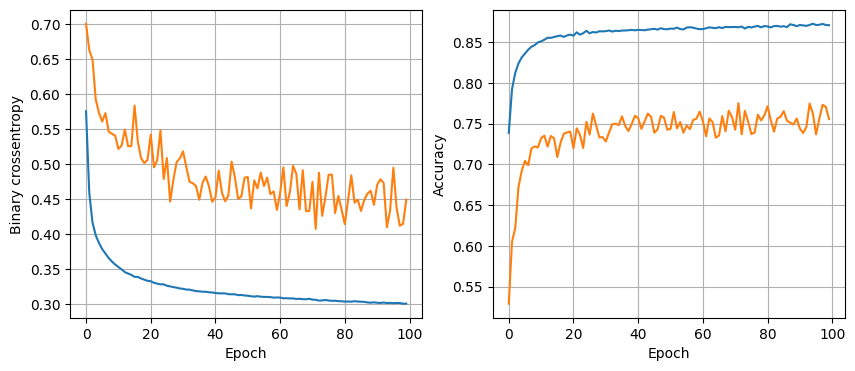

119/119 [==============================] - 0s 588us/step - loss: 0.3168 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.01, batch size 32


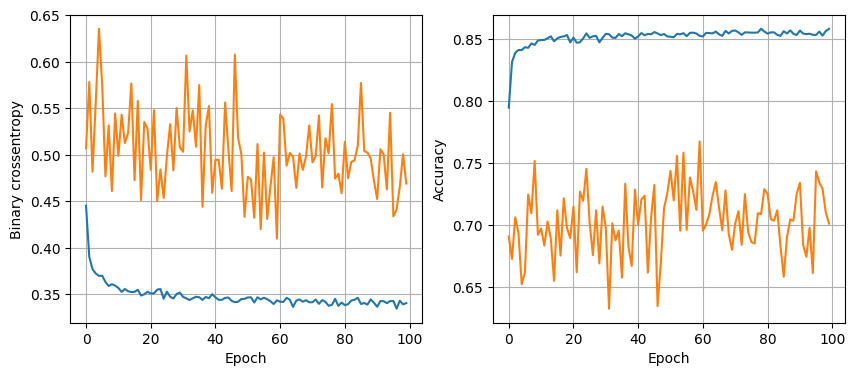

119/119 [==============================] - 0s 547us/step - loss: 0.3311 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.01, batch size 64


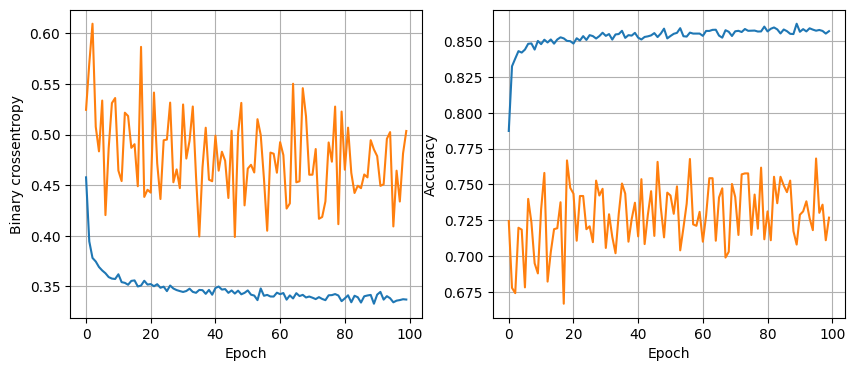

119/119 [==============================] - 0s 646us/step - loss: 0.3207 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.01, batch size 128


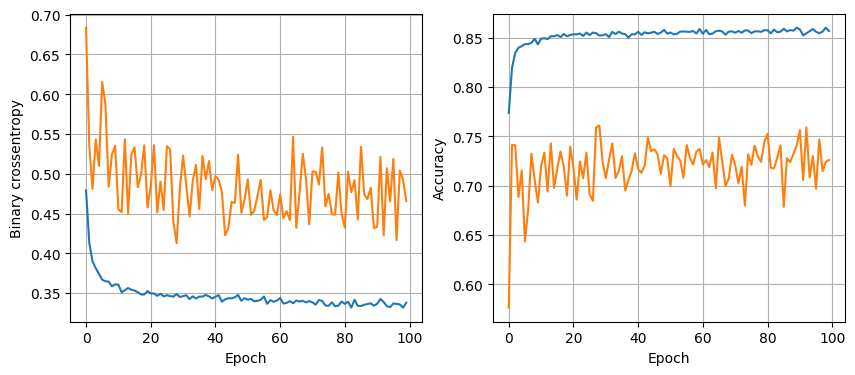

119/119 [==============================] - 0s 603us/step - loss: 0.3162 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.005, batch size 32


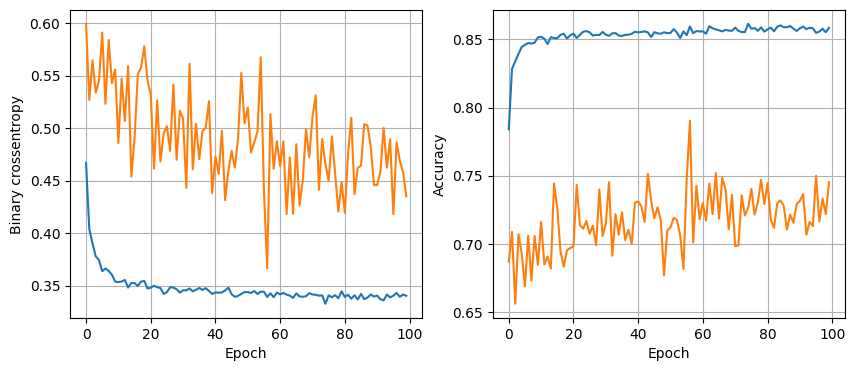

119/119 [==============================] - 0s 589us/step - loss: 0.3218 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.005, batch size 64


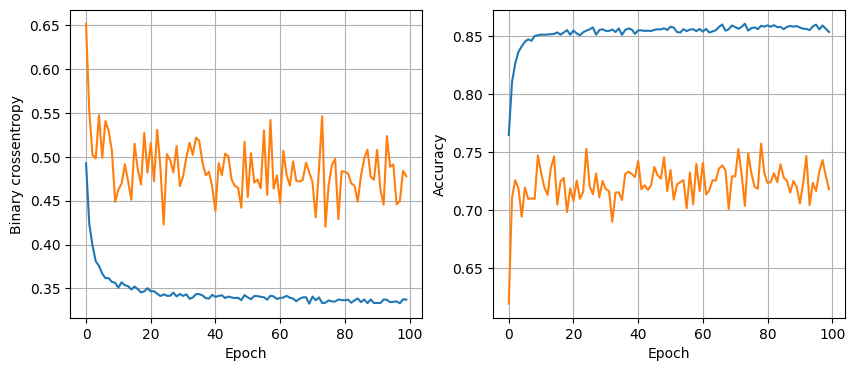

119/119 [==============================] - 0s 588us/step - loss: 0.3253 - accuracy: 0.8591
16 nodes, dropout 0.2, lr 0.005, batch size 128


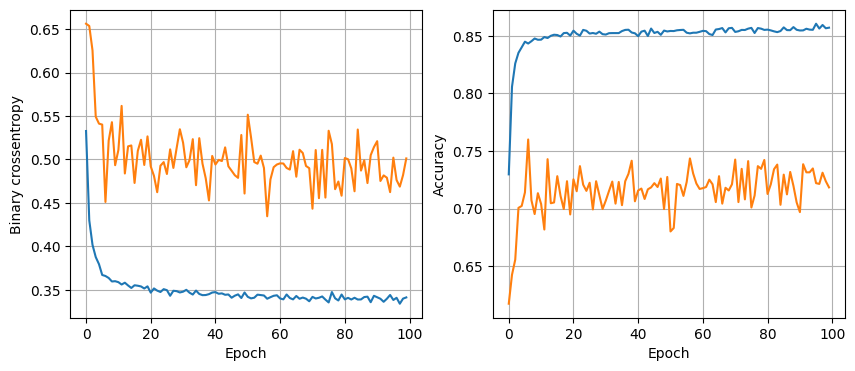

119/119 [==============================] - 0s 620us/step - loss: 0.3234 - accuracy: 0.8617
16 nodes, dropout 0.2, lr 0.001, batch size 32


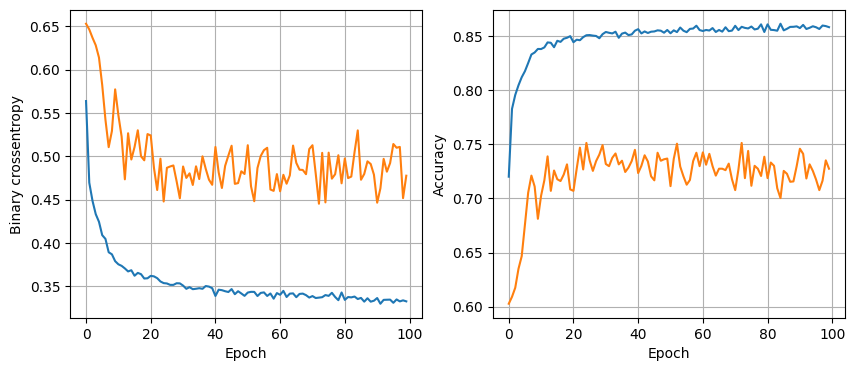

119/119 [==============================] - 0s 600us/step - loss: 0.3190 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.001, batch size 64


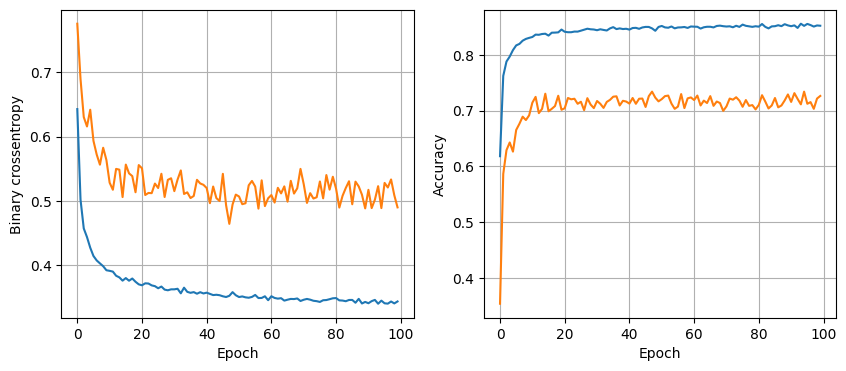

119/119 [==============================] - 0s 601us/step - loss: 0.3225 - accuracy: 0.8638
16 nodes, dropout 0.2, lr 0.001, batch size 128


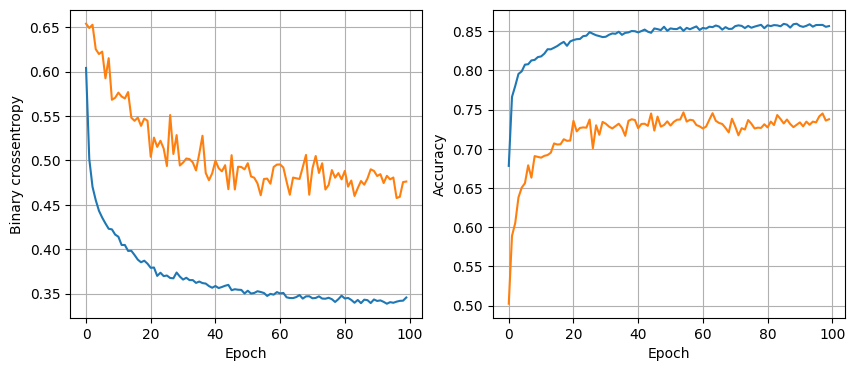

119/119 [==============================] - 0s 590us/step - loss: 0.3214 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.01, batch size 32


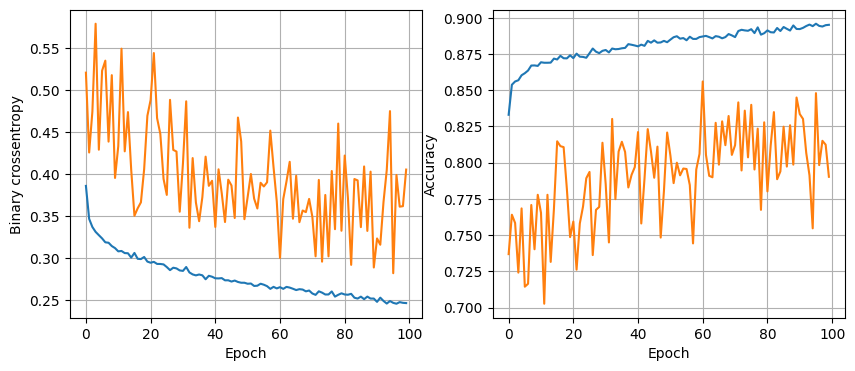

119/119 [==============================] - 0s 702us/step - loss: 0.3629 - accuracy: 0.8644
32 nodes, dropout 0, lr 0.01, batch size 64


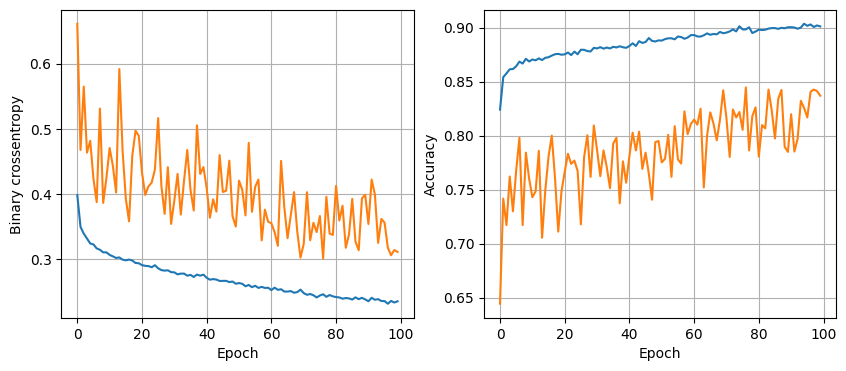

119/119 [==============================] - 0s 659us/step - loss: 0.3699 - accuracy: 0.8578
32 nodes, dropout 0, lr 0.01, batch size 128


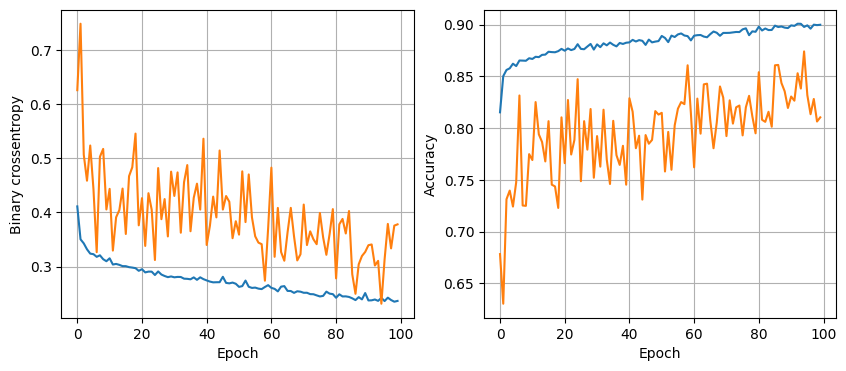

119/119 [==============================] - 0s 672us/step - loss: 0.3921 - accuracy: 0.8554
32 nodes, dropout 0, lr 0.005, batch size 32


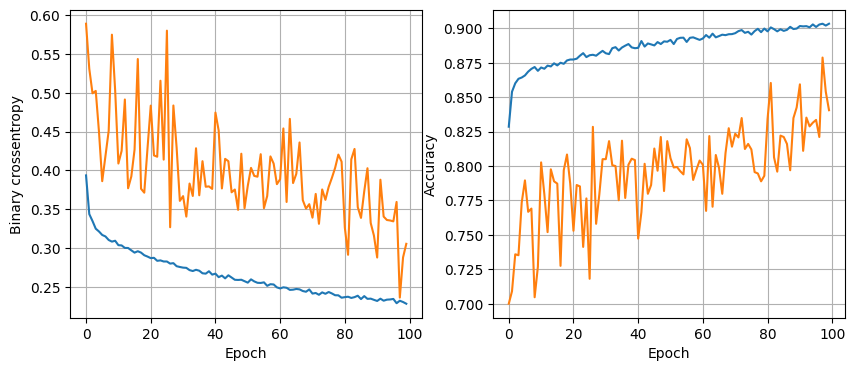

119/119 [==============================] - 0s 662us/step - loss: 0.3630 - accuracy: 0.8580
32 nodes, dropout 0, lr 0.005, batch size 64


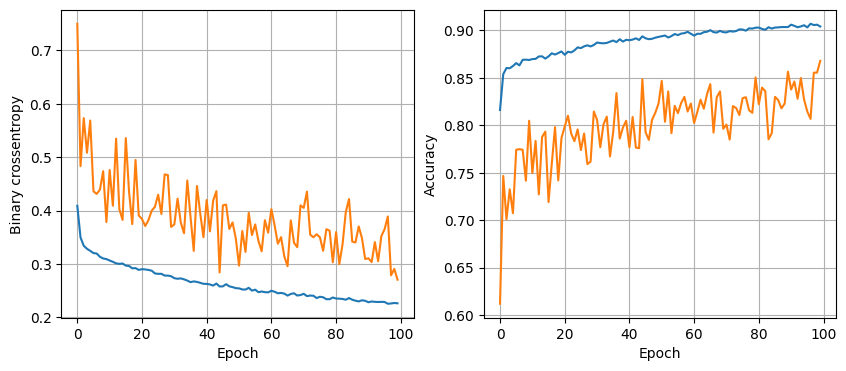

119/119 [==============================] - 0s 645us/step - loss: 0.3822 - accuracy: 0.8565
32 nodes, dropout 0, lr 0.005, batch size 128


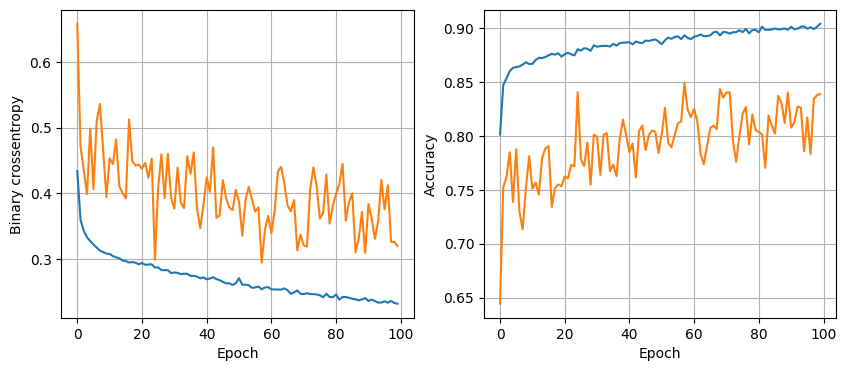

119/119 [==============================] - 0s 656us/step - loss: 0.3567 - accuracy: 0.8625
32 nodes, dropout 0, lr 0.001, batch size 32


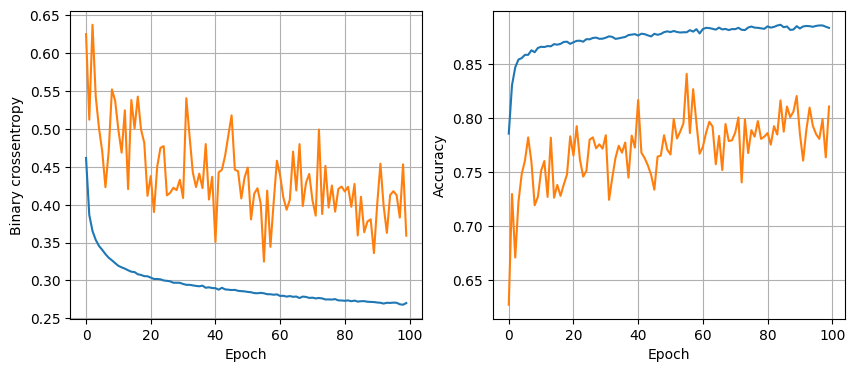

119/119 [==============================] - 0s 785us/step - loss: 0.3263 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.001, batch size 64


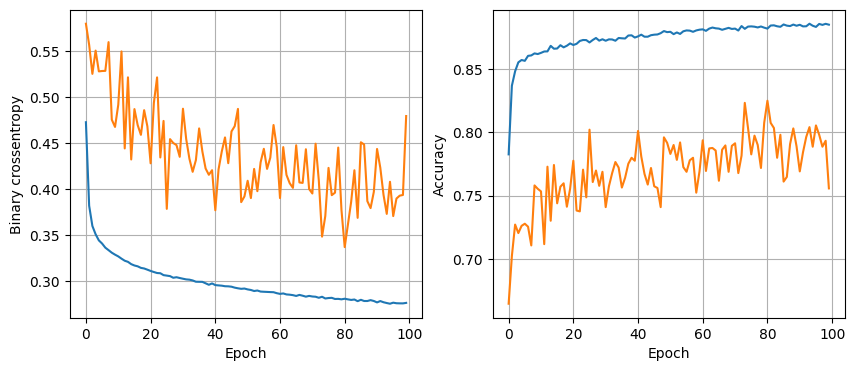

119/119 [==============================] - 0s 639us/step - loss: 0.3252 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.001, batch size 128


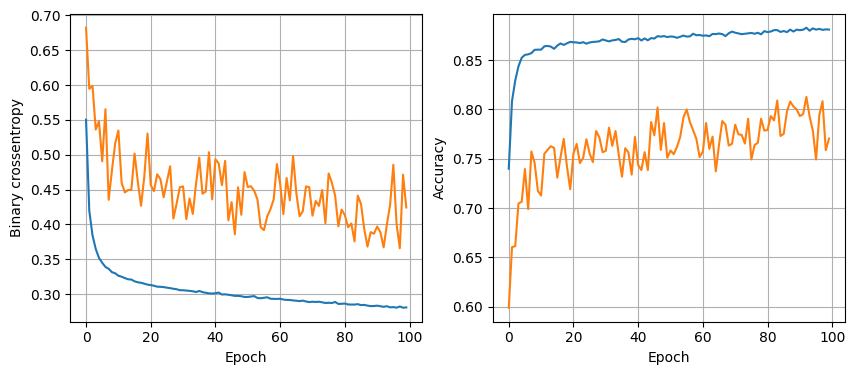

119/119 [==============================] - 0s 695us/step - loss: 0.3200 - accuracy: 0.8662
32 nodes, dropout 0.2, lr 0.01, batch size 32


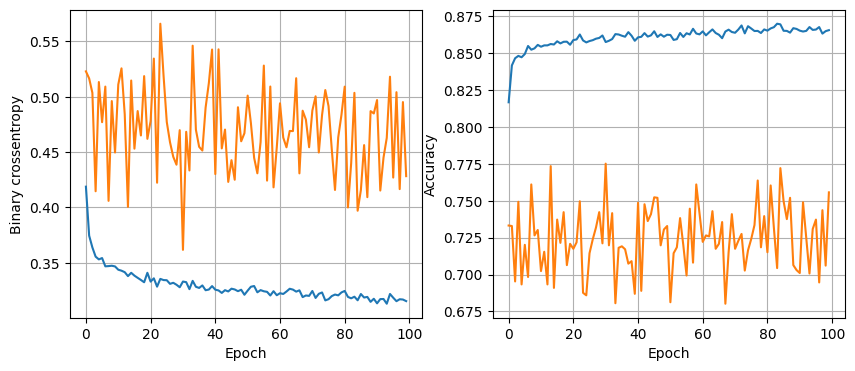

119/119 [==============================] - 0s 675us/step - loss: 0.3177 - accuracy: 0.8665
32 nodes, dropout 0.2, lr 0.01, batch size 64


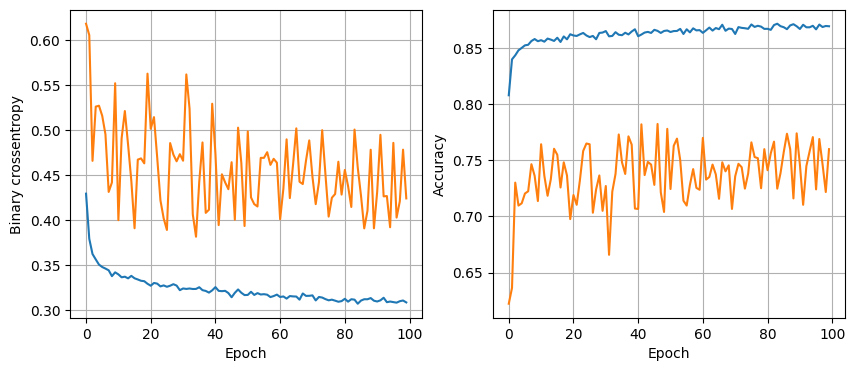

119/119 [==============================] - 0s 600us/step - loss: 0.3135 - accuracy: 0.8693
32 nodes, dropout 0.2, lr 0.01, batch size 128


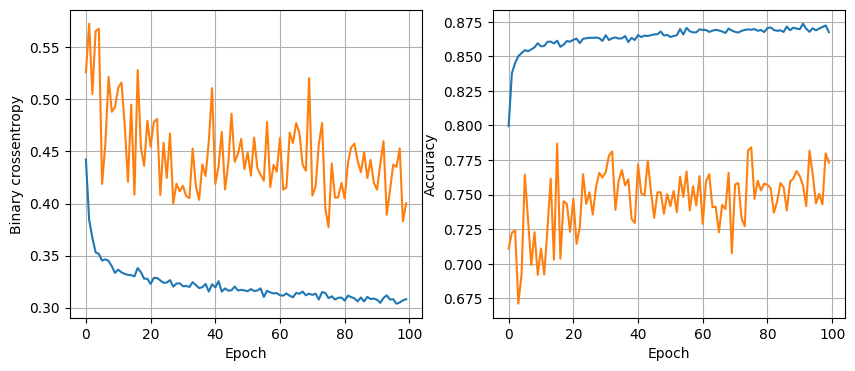

119/119 [==============================] - 0s 654us/step - loss: 0.3145 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.005, batch size 32


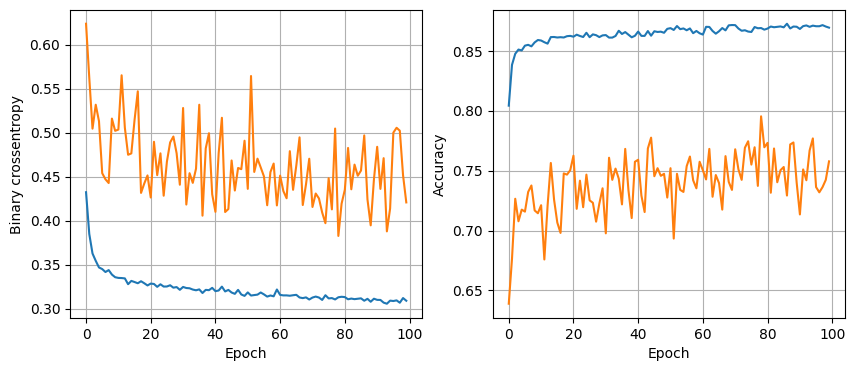

119/119 [==============================] - 0s 675us/step - loss: 0.3101 - accuracy: 0.8665
32 nodes, dropout 0.2, lr 0.005, batch size 64


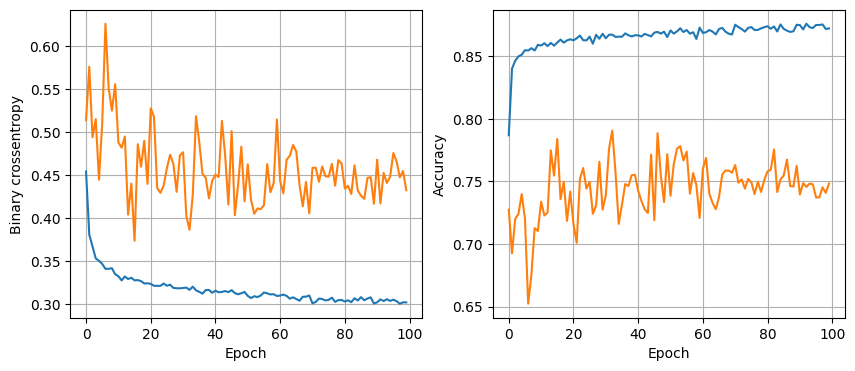

119/119 [==============================] - 0s 684us/step - loss: 0.3072 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.005, batch size 128


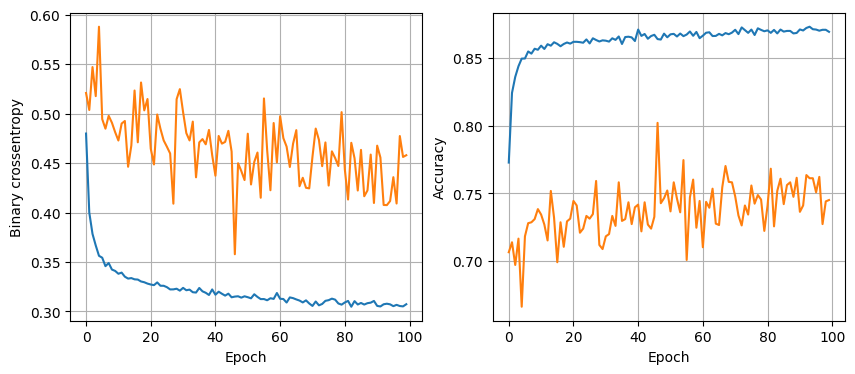

119/119 [==============================] - 0s 640us/step - loss: 0.3085 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.001, batch size 32


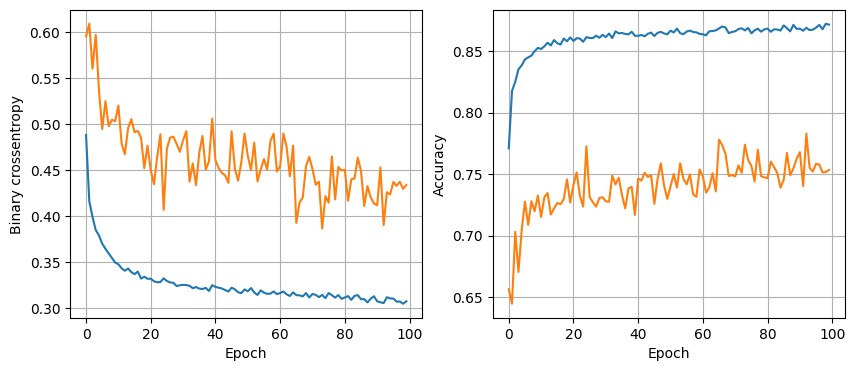

119/119 [==============================] - 0s 621us/step - loss: 0.3105 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.001, batch size 64


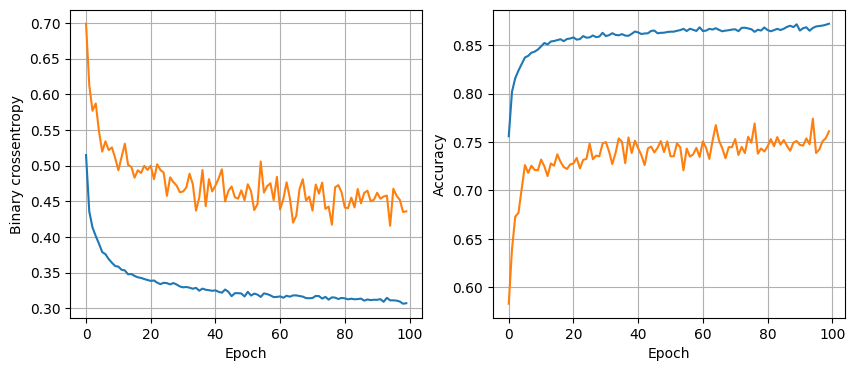

119/119 [==============================] - 0s 715us/step - loss: 0.3079 - accuracy: 0.8693
32 nodes, dropout 0.2, lr 0.001, batch size 128


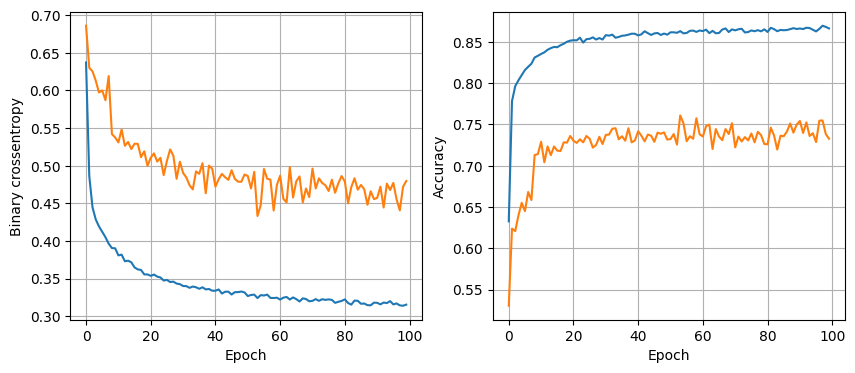

119/119 [==============================] - 0s 647us/step - loss: 0.3137 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.01, batch size 32


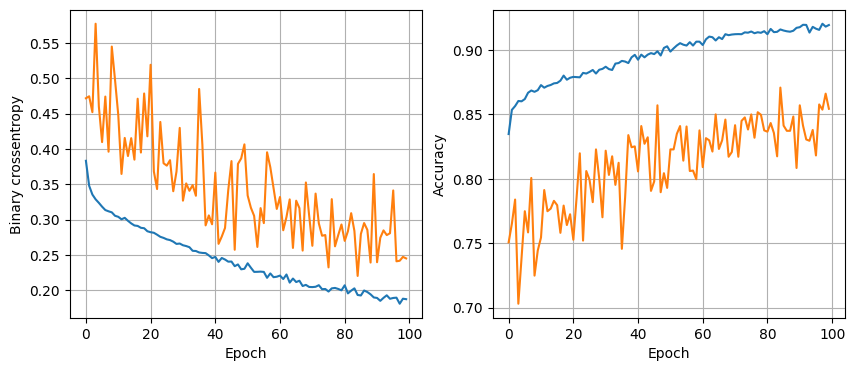

119/119 [==============================] - 0s 721us/step - loss: 0.5056 - accuracy: 0.8523
64 nodes, dropout 0, lr 0.01, batch size 64


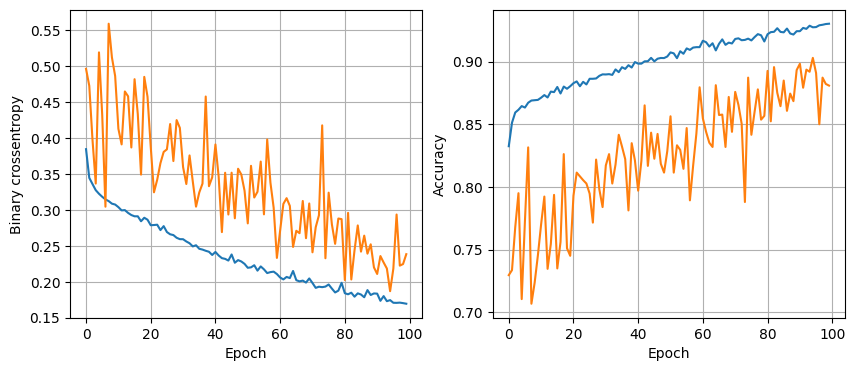

119/119 [==============================] - 0s 615us/step - loss: 0.5702 - accuracy: 0.8481
64 nodes, dropout 0, lr 0.01, batch size 128


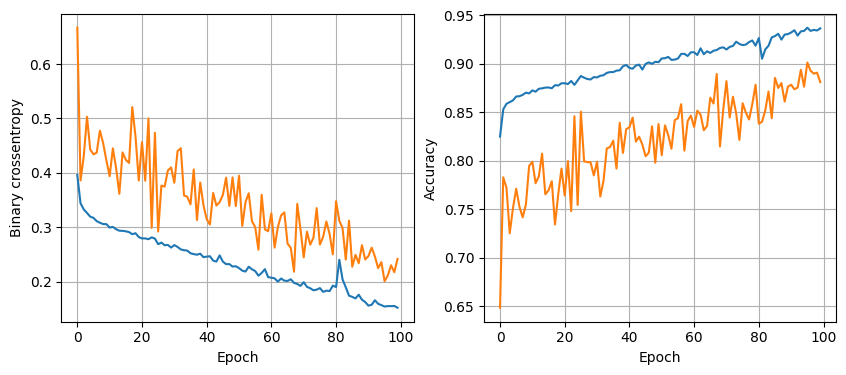

119/119 [==============================] - 0s 770us/step - loss: 0.5508 - accuracy: 0.8473
64 nodes, dropout 0, lr 0.005, batch size 32


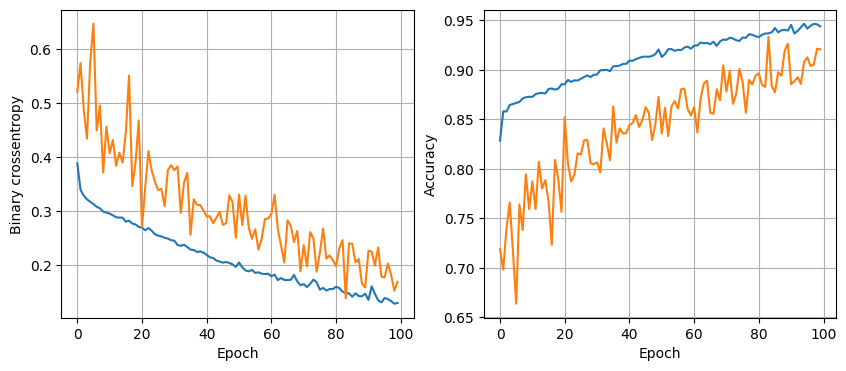

119/119 [==============================] - 0s 732us/step - loss: 0.6494 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.005, batch size 64


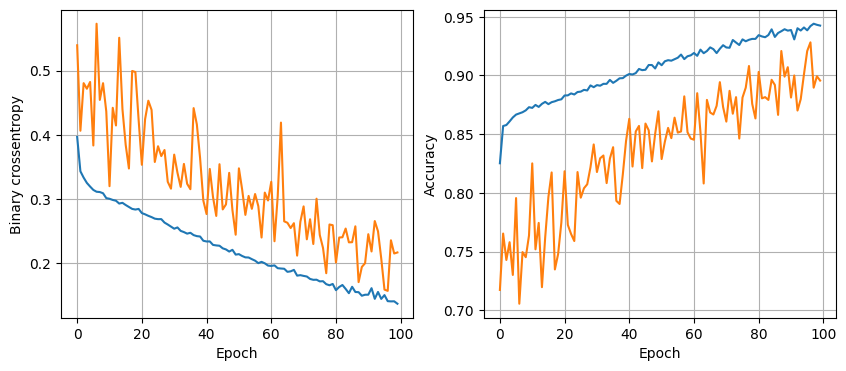

119/119 [==============================] - 0s 688us/step - loss: 0.5543 - accuracy: 0.8517
64 nodes, dropout 0, lr 0.005, batch size 128


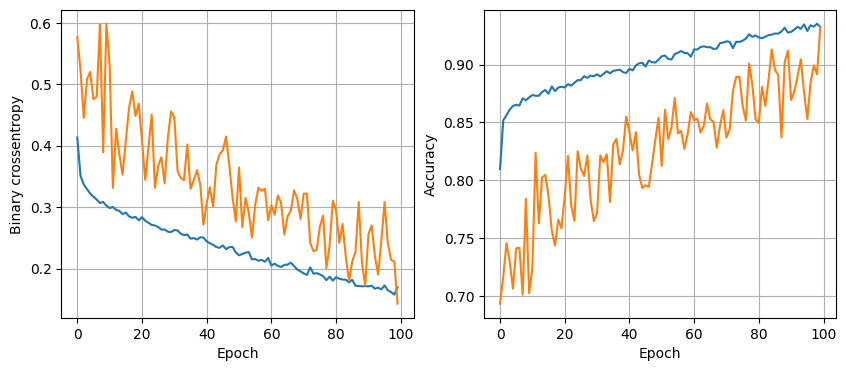

119/119 [==============================] - 0s 647us/step - loss: 0.5184 - accuracy: 0.8320
64 nodes, dropout 0, lr 0.001, batch size 32


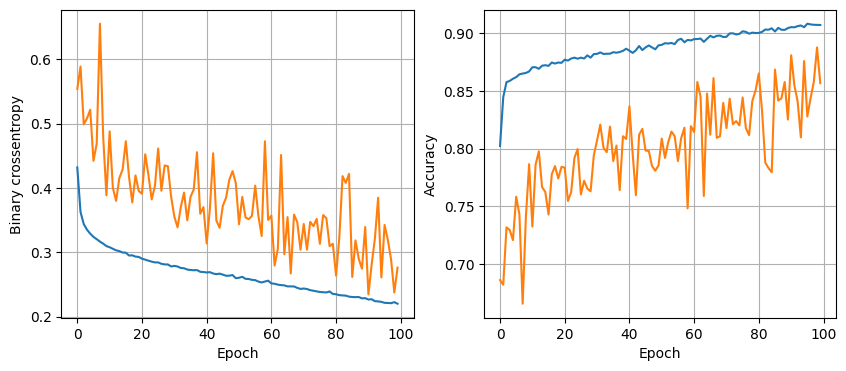

119/119 [==============================] - 0s 726us/step - loss: 0.3556 - accuracy: 0.8596
64 nodes, dropout 0, lr 0.001, batch size 64


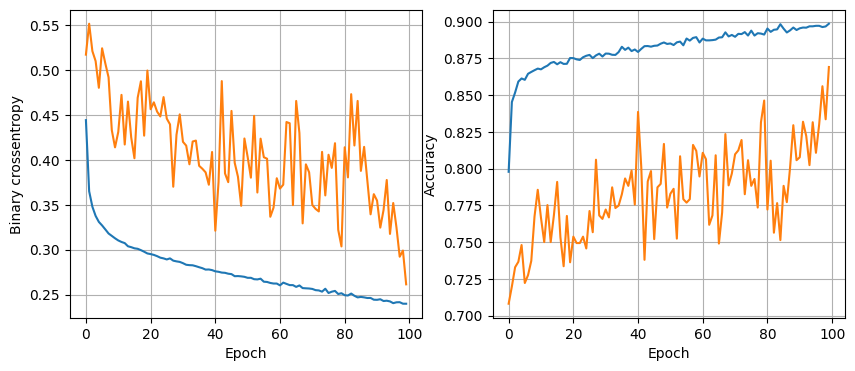

119/119 [==============================] - 0s 748us/step - loss: 0.3413 - accuracy: 0.8573
64 nodes, dropout 0, lr 0.001, batch size 128


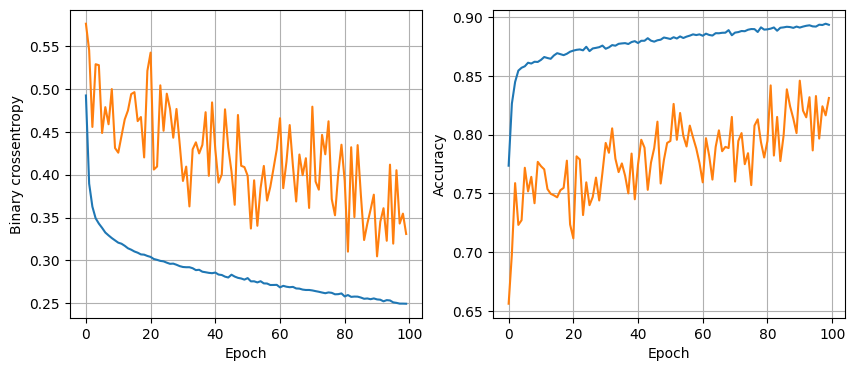

119/119 [==============================] - 0s 693us/step - loss: 0.3225 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.01, batch size 32


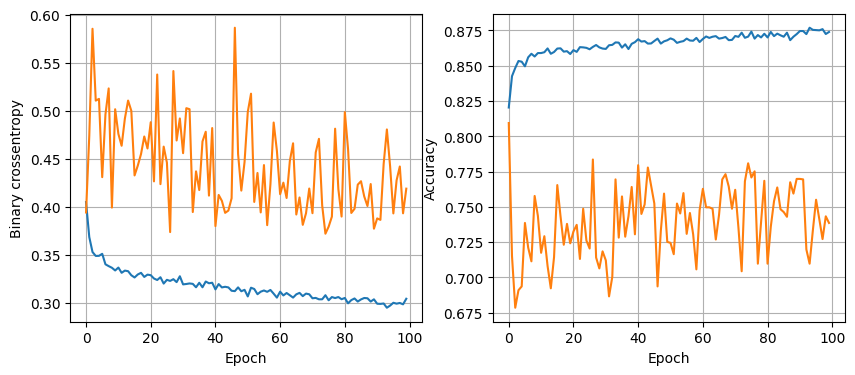

119/119 [==============================] - 0s 786us/step - loss: 0.3152 - accuracy: 0.8649
64 nodes, dropout 0.2, lr 0.01, batch size 64


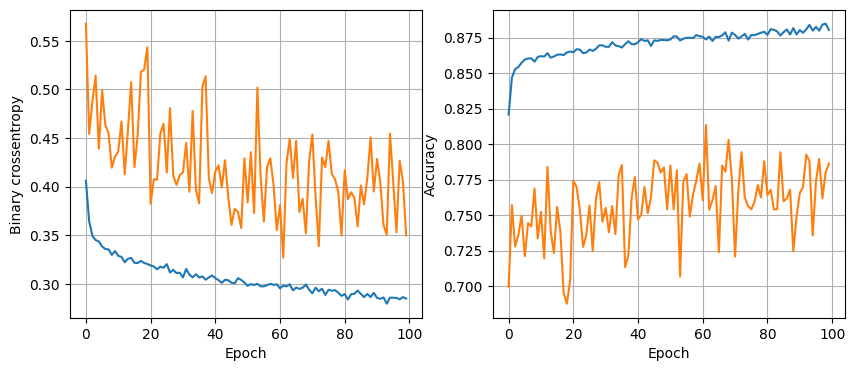

119/119 [==============================] - 0s 756us/step - loss: 0.3111 - accuracy: 0.8757
64 nodes, dropout 0.2, lr 0.01, batch size 128


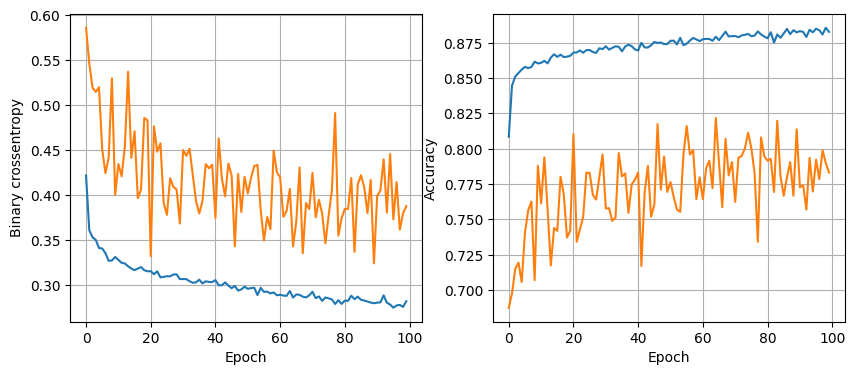

119/119 [==============================] - 0s 770us/step - loss: 0.3115 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.005, batch size 32


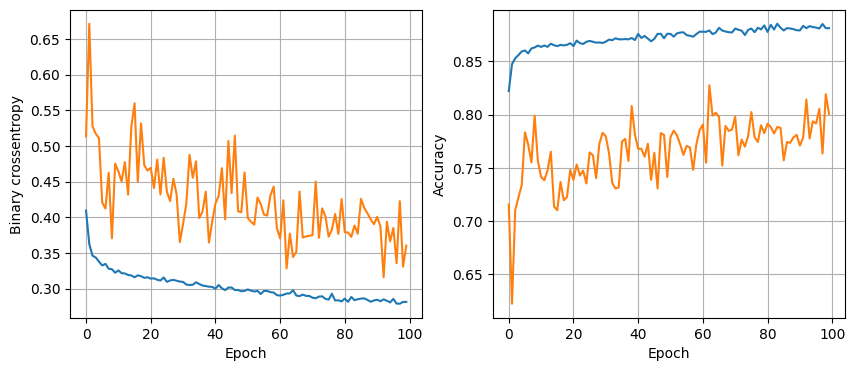

119/119 [==============================] - 0s 744us/step - loss: 0.3132 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.005, batch size 64


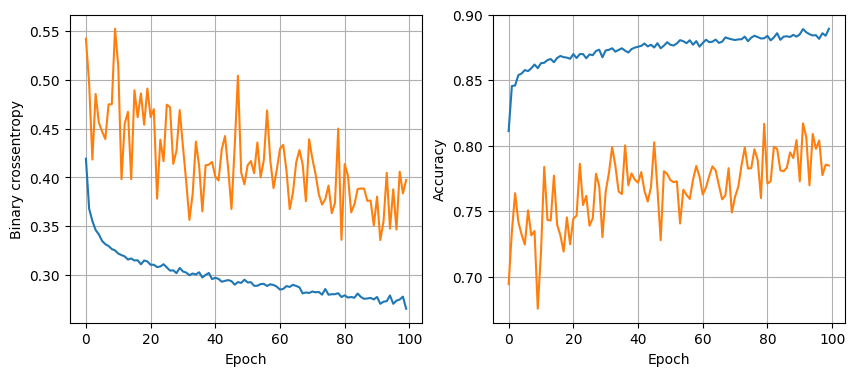

119/119 [==============================] - 0s 741us/step - loss: 0.3150 - accuracy: 0.8728
64 nodes, dropout 0.2, lr 0.005, batch size 128


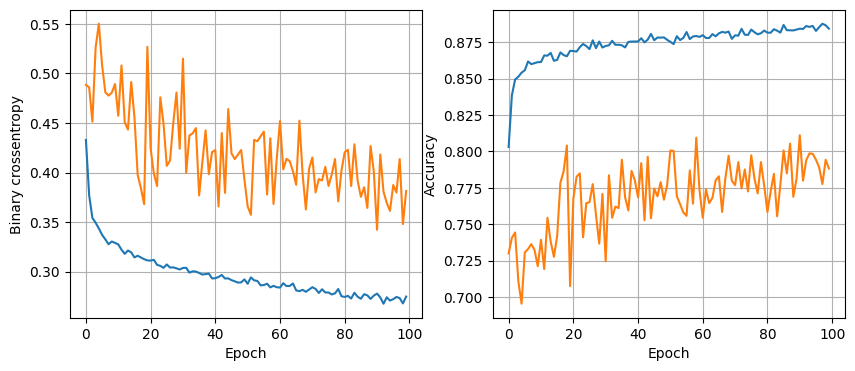

119/119 [==============================] - 0s 711us/step - loss: 0.3112 - accuracy: 0.8688
64 nodes, dropout 0.2, lr 0.001, batch size 32


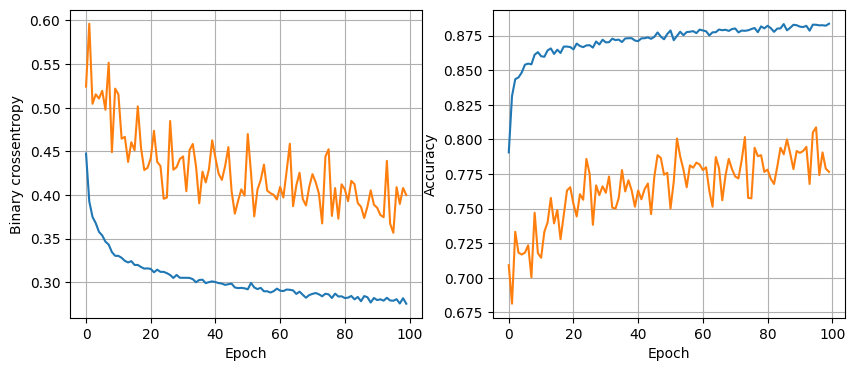

119/119 [==============================] - 0s 728us/step - loss: 0.2997 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.001, batch size 64


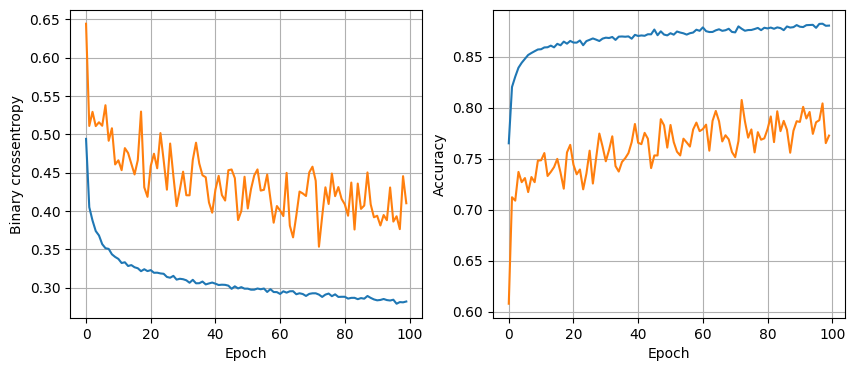

119/119 [==============================] - 0s 721us/step - loss: 0.3075 - accuracy: 0.8693
64 nodes, dropout 0.2, lr 0.001, batch size 128


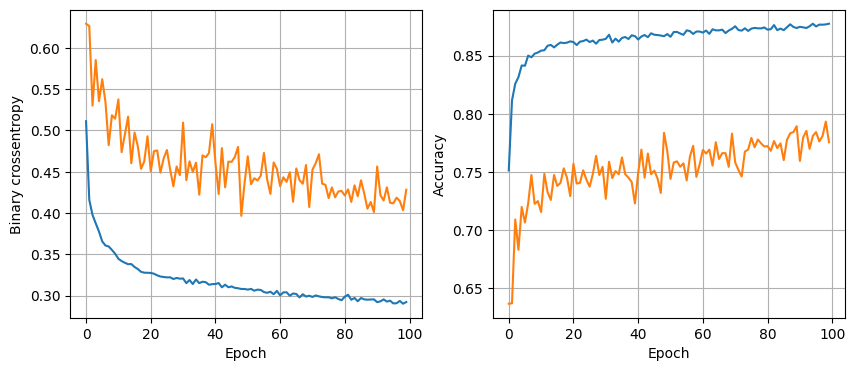

119/119 [==============================] - 0s 692us/step - loss: 0.3065 - accuracy: 0.8691


In [26]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [27]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 638us/step


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1388
           1       0.87      0.95      0.91      2416

    accuracy                           0.88      3804
   macro avg       0.89      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804

